# Practice 2
    Bulls.csv 는 경매시장에서 거래된 76마리의 어린(2살 이하) 황소의 특성과 거래가격(SalePr)에 
    관한 자료이다.변수 설명은 아래와 같다.
    -	Breed=1 if Angus, 5 if Hereford, 8 if Simental 소의 종류 
    -    SalePr = Price of the bull
    -	FtFrBody=fat free body (pounds) 소의 무게 
    -	Frame=Scale from 1(small) to 8 (large) 소의 크기별 등급 ( 1 ~ 8 )
    -	SaleHt=Sale height at shoulder (inches)
    -	YrHgt=Yearling height at shoulder (inches)
    -	PrctFFB=Percent fat-free body
    -	BkFat=Back fat (inches)
    -	SaleWt=Sale weight (pounds) 판매 당시 무게 
    SalePr와 Breed 변수를 제외한 7개의 변수를 사용해 주성분분석을 시행하여 아래의 질문에 답하시오. 
    (공분산행렬 혹은 상관계수 행렬을 사용)
    
1.	주성분을 계산하는데 사용된 고유값과 고유벡터를 찾으시오.
2.	적절한 주성분의 개수를 선택하고 근거를 설명하시오.
3.	각 주성분의 rotation값을 표와 그래프를 사용해 비교하고 주성분의 의미를 해석하시오.
4.	행렬도를 사용해 원변수와 주성분의 관계, 원변수 간의 상관관계,특이한 관측치의 존재 유무 등을 파악하고 설명하시오.
5.	첫 두개의 주성분을 사용해 산점도를 그리고 Breed를 서로 다른 색깔과 기호로 표시하시오.주성분에 의해 다른 종의 황소를 구분할 수 있는가?이상점이 있는가?있다면 어떤 특성을 가진 소인가?
6.	첫 주성분을 사용해 Q-Q plot을 그리고 해석하시오.


In [65]:
library(psych)
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [61]:
bulls <- read.csv("../0924_1001/bulls.csv", stringsAsFactors = F)
str(bulls)

'data.frame':	76 obs. of  9 variables:
 $ Breed   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ SalePr  : int  2200 2250 1625 4600 2150 1225 2250 4000 1600 1525 ...
 $ YrHgt   : num  51 51.9 49.9 53.1 51.2 49.2 51 51.5 50.1 49.6 ...
 $ FtFrBody: int  1128 1108 1011 993 996 985 959 1060 979 1083 ...
 $ PrctFFB : num  70.9 72.1 71.6 68.9 68.6 71.4 72.1 69.3 71.2 75.8 ...
 $ Frame   : int  7 7 6 8 7 6 7 7 6 6 ...
 $ BkFat   : num  0.25 0.25 0.15 0.35 0.25 0.15 0.2 0.3 0.25 0.3 ...
 $ SaleHt  : num  54.8 55.3 53.1 56.4 55 51.4 54 55.6 51.5 54.6 ...
 $ SaleWt  : int  1720 1575 1410 1595 1488 1500 1522 1765 1365 1640 ...


 - SalePr와 Breed 변수를 제외 
  - breed 종 => 제외 필요.
  - Salespr 가격 => 제외 필요 

In [62]:
head(bulls,3)

,Breed,SalePr,YrHgt,FtFrBody,PrctFFB,Frame,BkFat,SaleHt,SaleWt
1,1.00,2200.00,51.00,1128.00,70.90,7.00,0.25,54.80,1720.00
2,1.00,2250.00,51.90,1108.00,72.10,7.00,0.25,55.30,1575.00
3,1.00,1625.00,49.90,1011.00,71.60,6.00,0.15,53.10,1410.00


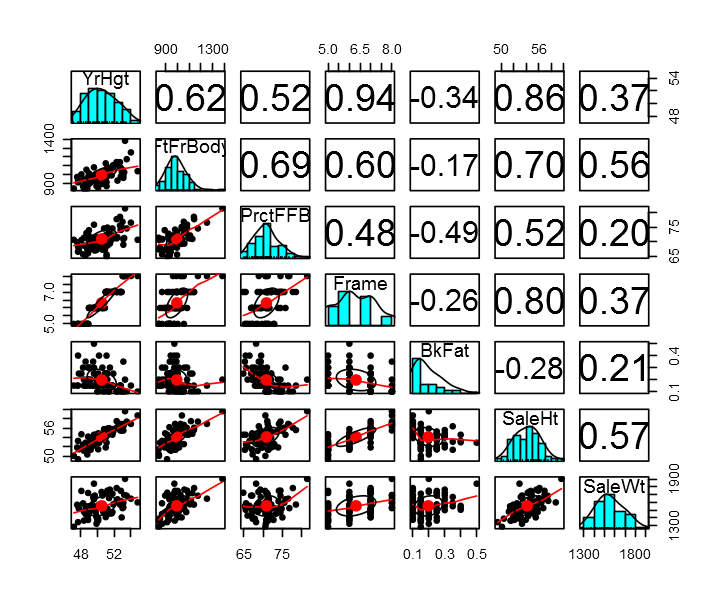

In [66]:
options(repr.plot.width = 6, repr.plot.height = 5)
pairs.panels(bulls[,-c(1,2)])

 - BkFat 과 같은 경우 오른쪽 꼬리 그래프가 나온다. 한군대에 뭉쳐져 있다. => 분산시키기 위해 log 변환 

## 1. 주성분을 계산하는데 사용된 고유값과 고유벡터를 찾으시오.
 - 각 항목당 나타내는 수치가 달라 표준화 작업이 필요할 것으로 판단 된다. 

In [67]:
bulls_pca <- prcomp(bulls[,-c(1,2)], scale =T)

In [1]:
summary(bulls_pca)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     1.9969 1.1809 0.8588 0.66918 0.47481 0.39930 0.21841
Proportion of Variance 0.5696 0.1992 0.1053 0.06397 0.03221 0.02278 0.00681
Cumulative Proportion  0.5696 0.7689 0.8742 0.93820 0.97041 0.99319 1.00000

In [32]:
bulls_pca$sdev^2

[1] 3.98756706 1.39456969 0.73747745 0.44779820 0.22544748 0.15943802 0.04770209

#### 1) 고유값 
 - 각각의 $y_1,\cdots,y_q$ 값의 분산이 고유값 이다. 

In [48]:
sum(bulls_pca$sdev^2) # 총 분산의 합은 변수가 7개 이므로 7이 된다. 

[1] 7

In [46]:
# 1. 방법
data.frame("고유값"=bulls_pca$sdev^2, row.names =c("PC1","PC2","PC3","PC4","PC5","PC6","PC7"))

,고유값
PC1,3.987567
PC2,1.39457
PC3,0.7374774
PC4,0.4477982
PC5,0.2254475
PC6,0.159438
PC7,0.04770209


In [47]:
# 2. 고유 성징을 이용한 고유값 추출
apply(bulls_pca$x,2,var)

PC1        PC2        PC3        PC4        PC5        PC6        PC7 
3.98756706 1.39456969 0.73747745 0.44779820 0.22544748 0.15943802 0.04770209

#### 2) 고유벡터 

In [12]:
bulls_pca$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
YrHgt,-0.4623190011,-0.0002182697,0.3870635700,-0.1155274623,0.0594491965,0.0890764975,-0.7820661496
FtFrBody,-0.407651919,-0.105596889,-0.481090595,-0.287417421,-0.707310802,0.091212650,0.001989708
PrctFFB,-0.34226078,0.38073351,-0.53914610,-0.26961058,0.60436718,-0.09574160,0.01024848
Frame,-0.44153457,-0.04519061,0.43746299,-0.24289660,0.12271741,0.45540005,0.57461609
BkFat,0.209008521,-0.667525196,-0.002545244,-0.645273692,0.215185215,-0.215931906,-0.037545569
SaleHt,-0.45460205,-0.12940410,0.18627105,0.22579350,-0.03919979,-0.79666187,0.23389141
SaleWt,-0.24007968,-0.61604687,-0.31933974,0.55226368,0.26080007,0.29307551,-0.04432879


## 2. 적절한 주성분의 개수를 선택하고 근거를 설명하시오.
 - 주성분 개수를 결정하는 것에 있어서 누적 분상의 합이 70~90%를 설명한다면 선택하는 것에 좋다고 판단됩니다. 
 - 그리고 Plot 의 Line차트를 이용하여 그래프의 기울기를 활용하여 설명도의 정도가 줄어드는 시점을 선택하면 될것으로 생각됩니다.

In [16]:
summary(bulls_pca) # 현재는 PC2~PC3에서 선택하면 될 것으로 판단됩니다. 

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     1.9969 1.1809 0.8588 0.66918 0.47481 0.39930 0.21841
Proportion of Variance 0.5696 0.1992 0.1053 0.06397 0.03221 0.02278 0.00681
Cumulative Proportion  0.5696 0.7689 0.8742 0.93820 0.97041 0.99319 1.00000

 - 그래프의 기울기로 판단하여 PC3 이후로 기울기의 변화가 적은 것으로 생각되어 3개 즉, $PC3$까지 선택하는 것으로 판단. 

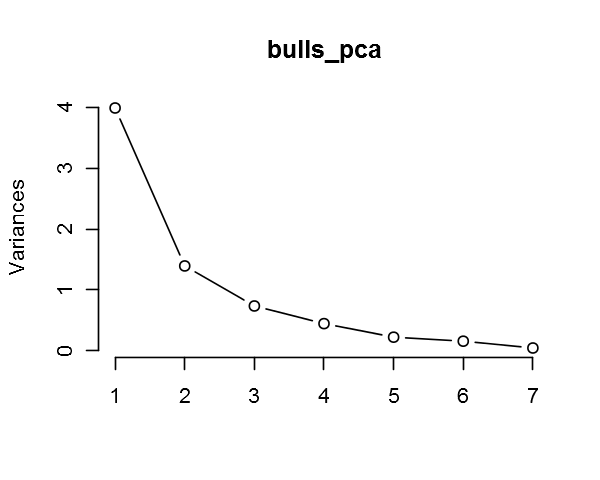

In [22]:
options(repr.plot.width = 5, repr.plot.height=4)
plot(bulls_pca,type="l") 

## 3.각 주성분의 rotation값을 표와 그래프를 사용해 비교하고 주성분의 의미를 해석하시오.
 - 3개의 주성분을 이용하여 분석하려고 했으므로 PC1,PC2,PC3를 사용하겠습니다. 

In [49]:
bulls_pca$rotation[,1:3]

,PC1,PC2,PC3
YrHgt,-0.4623190011,-0.0002182697,0.3870635700
FtFrBody,-0.4076519,-0.1055969,-0.4810906
PrctFFB,-0.3422608,0.3807335,-0.5391461
Frame,-0.44153457,-0.04519061,0.43746299
BkFat,0.209008521,-0.667525196,-0.002545244
SaleHt,-0.4546020,-0.1294041,0.1862710
SaleWt,-0.2400797,-0.6160469,-0.3193397


 #### PC1 분석
 
 #### PC2 분석

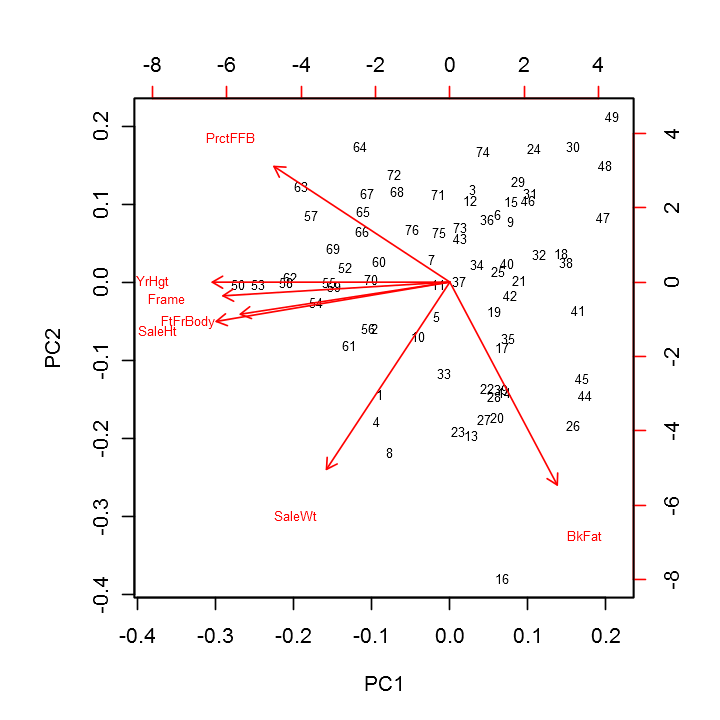

In [57]:
options(repr.plot.width=6, repr.plot.height=6)
biplot(bulls_pca,cex=0.6)

#### PC3

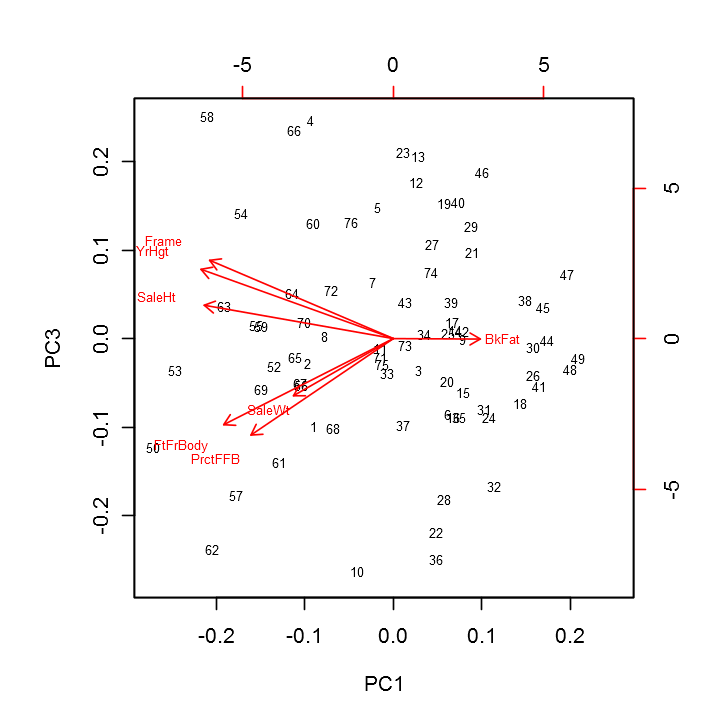

In [59]:
biplot(bulls_pca,cex=0.6, c(1,3))

## 5. 첫 두개의 주성분을 사용해 산점도를 그리고 Breed를 서로 다른 색깔과 기호로 표시하시오. <br>주성분에 의해 다른 종의 황소를 구분할 수 있는가?<br>이상점이 있는가?있다면 어떤 특성을 가진 소인가?

In [75]:
DF <- data.frame(PC1 = bulls_pca$x[,1], PC2= bulls_pca$x[,2], Breed = as.numeric(bulls$Breed))
head(DF)

,PC1,PC2,Breed
1,-1.417457,1.398317,1.000000
2,-1.504286,0.586763,1.000000
3,0.601151,-1.132225,1.000000
4,-1.506542,1.659244,1.000000
5,-0.1949575,0.3672884,1.0000000
6,1.1173409,-0.8016167,1.0000000


In [79]:
plot(DF, col = Breed)

ERROR: Error in pairs.default(data.matrix(x), ...): object 'Breed' not found


## 6.첫 주성분을 사용해 Q-Q plot을 그리고 해석하시오.

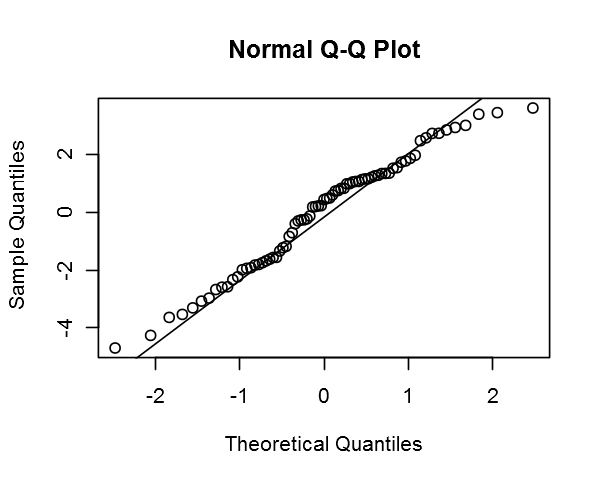

In [26]:
qqnorm(bulls_pca$x[,1])
qqline(bulls_pca$x[,1])